#                            PATHRISE CHALLENGE - INSIGHT

Pathrise is a career accelerator, helping jobs seekers in USA and Canada. This take-home data analysis is to uncover insight about the chance of placing candidates with employers, and also how long she/he will be in the program.

In [2]:
                        #***************************************************#
                        #           Analysis by Youssouf Traore             #
                        #***************************************************#

### Libraries

In [ ]:
# Libraries will bring new functionalities to code faster.

In [120]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import statsmodels.api as sm

### Importing data

In [65]:
df = pd.read_excel(r'/home/ytraore/Desktop/Coding/Data_Pathrise.xlsx')

In [67]:
df.head(4)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify


In [68]:
df.shape

(2544, 16)

In [69]:
# The file contains 2544 candidates and there are 16 features.

## Exploratory Data Analysis (EDA)

In this section, I will explore the data to have some quick information about the content without using sophisticated statistical tools. This will also help us have some confirmation about the models that I will create later.

This multi-variable data has numerical and categorical entries; That means it will require some preprocessing before any training is done on it.

In [70]:
avg_duration = np.mean(df[df['placed'] == 1]['program_duration_days'])
print(avg_duration)

161.1213389121339


Without manupilating the missing data in program duration, it appears that candidates who have been placed spent on average 4 months in the program.

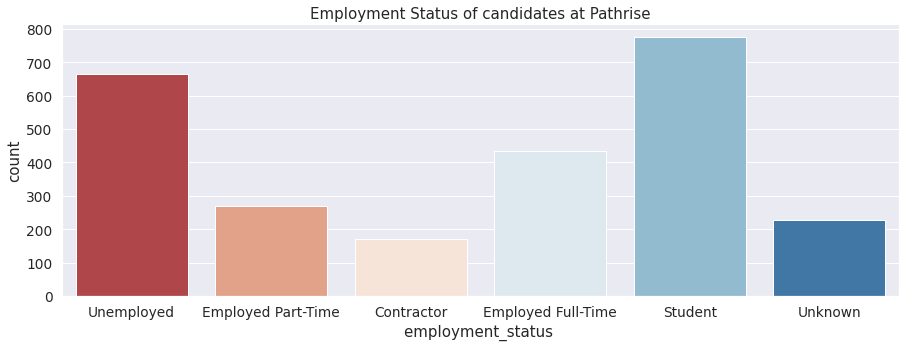

In [155]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.25, palette= "RdBu")
sns.countplot(data = df, x = "employment_status ")
plt.title('Employment Status of candidates at Pathrise')
plt.show()

In [72]:
work_auth = df['work_authorization_status'].value_counts()

This grath and code below show that more candidates have been placed than they are currently active in the data.

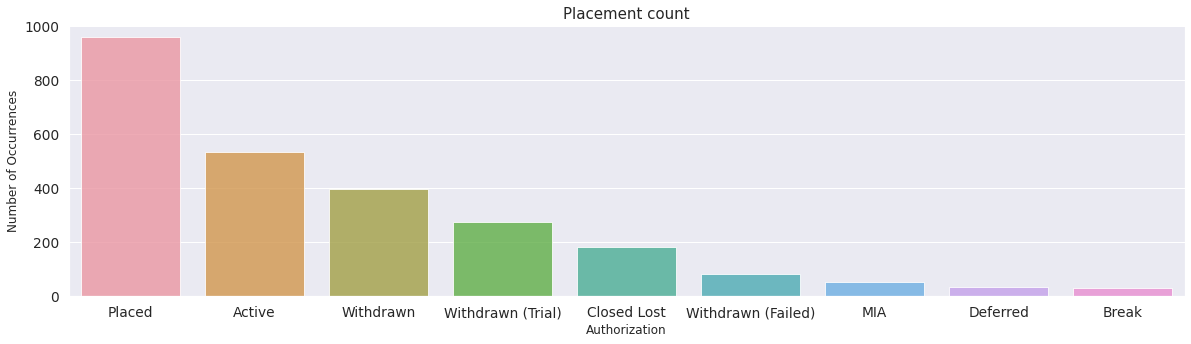

In [152]:
pathrise_status = df['pathrise_status'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(pathrise_status.index, pathrise_status.values, alpha=0.8)
plt.title('Placement count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Authorization', fontsize=12)
plt.show()

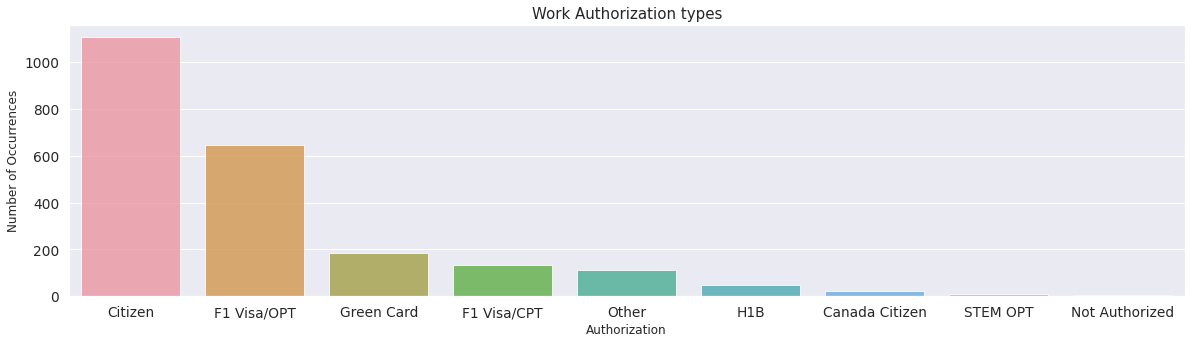

In [151]:
# I will plot the count for Work Authorization here
plt.figure(figsize=(20,5))
sns.barplot(work_auth.index, work_auth.values, alpha=0.8)
plt.title('Work Authorization types')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Authorization', fontsize=12)
plt.show()

The majority of candidates are US citizens.

## Dealing with Missing data

Most files have missing values, and finding workaround those missing values is an important part of a Data Scientist's job. There are different techniques and solutions on how to handle such problem.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

The above summary tells us that there are missing data as the numbers don't match across the columns. However, I would like to have a percentage, for better understanding. The code below will assist:

In [75]:
# I will create a python function to go over the data for missing data

def features_with_missing_values(df):
    x = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in df.columns:
        if df[i].isna().sum()>0:
            print('The Feature',i,' has '+ str(df[i].isna().sum()) + ' missing values')
            
# Calling the function here:
features_with_missing_values(df)

Percentage of Total Missing Values is  5.51 %
Missing Value Estimation :
The Feature cohort_tag  has 8 missing values
The Feature program_duration_days  has 616 missing values
The Feature employment_status   has 229 missing values
The Feature highest_level_of_education  has 58 missing values
The Feature length_of_job_search  has 74 missing values
The Feature biggest_challenge_in_search  has 24 missing values
The Feature professional_experience  has 222 missing values
The Feature work_authorization_status  has 284 missing values
The Feature number_of_interviews  has 218 missing values
The Feature gender  has 492 missing values
The Feature race  has 18 missing values


The "program_duration_days" feature seems to be have the most missing data, followed by the work_authorization_status. These, among others, will need to be handled.  My suggestion would be to fill in the program with the average duration. As for Categorical data of Gender, I would like to use the Mode, which is a measure of centrality, which means it will be replaced by the most frequent occurence. However, the mode method is not perfect, because it could create a bias. 

In [76]:
df['gender']=df['gender'].fillna((df['gender'].mode()[0]))

As for the number of interview, and the average duration, I will use the Mean of the columns, initiated with the code below.

In [77]:
mean_Ave_Interview = df['number_of_interviews'].mean()
mean_program_duration = df['program_duration_days'].mean()
df_interview = df.fillna(value = {'number_of_interviews' : mean_Ave_Interview})
df = df_interview.fillna(value = {'program_duration_days' : mean_program_duration})

In [78]:
df.head(4)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,136.098548,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,136.098548,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify


In [79]:
features_with_missing_values(df)

Percentage of Total Missing Values is  2.25 %
Missing Value Estimation :
The Feature cohort_tag  has 8 missing values
The Feature employment_status   has 229 missing values
The Feature highest_level_of_education  has 58 missing values
The Feature length_of_job_search  has 74 missing values
The Feature biggest_challenge_in_search  has 24 missing values
The Feature professional_experience  has 222 missing values
The Feature work_authorization_status  has 284 missing values
The Feature race  has 18 missing values


From the changes that I have made, the percentage of missing values has decreased by almost half. The remaining are mostly categorical data that I will need to find a strategy for handle. Even though the above graph tells us that the majority of candidates are citizen, more than 280 candidates haven't provided a status or the information is missing. One technique is to fill in with Unknow, which could become an important information on its own later. 

In [80]:
# I will create a quick procedure here to fill in the missing data. Instead of filling in the missing information
# with a generated input, I choose the Unknown. Sometimes, it's better than other methods. 
df_unknown_imputed = df.fillna("Unknown")

In [81]:
features_with_missing_values(df_unknown_imputed)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :


Now, our missing data percentage has fallen to zero, which will move forward our analysis.

# Modeling

In this analysis, I will be dealing with two types of problems: a forecasting problem for the program duration, and a classification problem to see if a particular candidate will be placed or not.

In [88]:
# I will drop some columns that are relevant in our analysis
df = df_unknown_imputed.drop(['id', 'cohort_tag'], axis=1)
df.head()

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,136.098548,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,136.098548,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,89.000000,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


### Encoding for Machine Learning

Our data contains both numerical and categorical values. However for the model to work, all values should be numerical. There exists different technique to encode categorial data to numerical; in this case I will use scikit LabelEncoder; further processing could have helped.

In [86]:
# I am using an encoder to change the values
labenco = defaultdict(LabelEncoder)
df_encoded = df.apply(lamba x: labenco[x.name].fit_transform(x))
df_encoded

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,0,4,136,0,4,0,1,5,1,0,2,39,2,6
1,0,3,136,0,4,5,1,2,0,1,7,0,2,6
2,2,1,0,0,2,4,3,1,3,1,0,0,2,2
3,2,3,0,0,0,0,3,2,3,1,6,13,2,1
4,5,4,89,1,4,0,0,5,0,3,11,23,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7,1,374,0,0,4,2,8,2,1,5,11,2,6
2540,7,0,389,0,5,4,1,5,0,3,1,7,2,6
2541,0,4,136,0,0,0,3,8,0,1,1,14,1,6
2542,0,4,136,0,5,4,3,8,0,1,2,10,2,1


## Classification Problem - Placement

In the first part of the analysis, I would like to create a model that can predict if a candidate will be placed, given information such as Professional experience, number of application...I will also normalize the data:

In [129]:
df_encoded =((df_encoded-df_encoded.min())/(df_encoded.max()-df_encoded.min()))*20 # Normalizing df

X=df_encoded[['pathrise_status', 'primary_track', 'program_duration_days', 'employment_status ', 'highest_level_of_education',
             'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
              'number_of_interviews', 'number_of_applications', 'gender', 'race']]

# Dependant variable
y=df_encoded['placed']

#I will use scikit learn split module to perform the split and get training and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24) # 70 will be training

In [136]:
X_test.head(5)

,pathrise_status,primary_track,program_duration_days,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2103,7.5,16.0,0.000000,20.0,0.0,12.0,10.0,15.0,8.888889,3.809524,5.5,6.666667,13.333333
1261,0.0,12.0,6.618005,8.0,0.0,8.0,6.0,5.0,2.222222,0.952381,11.0,6.666667,15.555556
1426,12.5,4.0,3.844282,12.0,0.0,8.0,10.0,0.0,6.666667,0.000000,9.0,6.666667,13.333333
2159,0.0,16.0,6.618005,16.0,0.0,12.0,8.0,10.0,6.666667,0.952381,9.0,13.333333,15.555556
2237,0.0,16.0,6.618005,12.0,0.0,12.0,10.0,15.0,6.666667,0.000000,14.5,13.333333,15.555556


#### Random Forest Classifier Model

In [130]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


While trying the Random Forest Classiferr to find out if there will be placement or not, the accuracy of the algorithm is almost impossible. This can be due to an error in the code, lack of normalization or due to some imbalancing in the data. I will use another model to check the accuracy.

#### Logistic Regression

In [131]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 58.64%


In the above model validation, I have used the Logistic Regression model to check the accuracy, but it seems like this is way lower that the 100% that was received with the Random Forest Classifier.

#### K-Fold Cross-Validation

In [273]:
# Kfold model
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

/home/ytraore/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Accuracy: 59.21%


TK-Fold Cross-Validation gave me a mean accuracy of 59%, just slightly highter than the Logistic Regression model. I am considering working on the features to select the ones that have more impact on the accuracy.

## Feature Importance

In this first example, I would like to know features that the Ramdom Forest model has considered the most important. Status has been given the most weight, which is questionable and should require further consideration. 

Feature: 0, Score: 0.68164
Feature: 1, Score: 0.00891
Feature: 2, Score: 0.18044
Feature: 3, Score: 0.01400
Feature: 4, Score: 0.00980
Feature: 5, Score: 0.01111
Feature: 6, Score: 0.01579
Feature: 7, Score: 0.01052
Feature: 8, Score: 0.01126
Feature: 9, Score: 0.01490
Feature: 10, Score: 0.02222
Feature: 11, Score: 0.00462
Feature: 12, Score: 0.01478


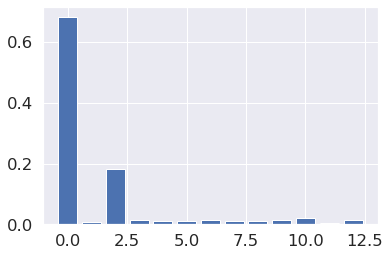

In [282]:
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In the code below, I look at features that the logistic regression has given most value in the prediction.

Feature: 0, Score: 0.20969
Feature: 1, Score: 0.07255
Feature: 2, Score: 0.00402
Feature: 3, Score: 0.09142
Feature: 4, Score: -0.04466
Feature: 5, Score: -0.01469
Feature: 6, Score: -0.03839
Feature: 7, Score: -0.03148
Feature: 8, Score: 0.01176
Feature: 9, Score: -0.00490
Feature: 10, Score: -0.01167
Feature: 11, Score: 0.01215
Feature: 12, Score: 0.06829


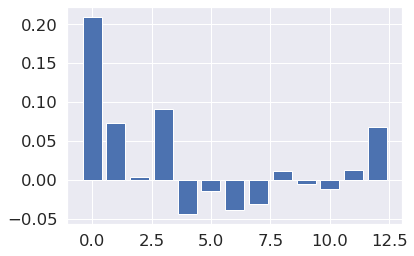

In [284]:
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In the Logistic Regression model, even though feature 0 has been given the most weight I learned that there are some features that are negatively impacting the accuraty of the model

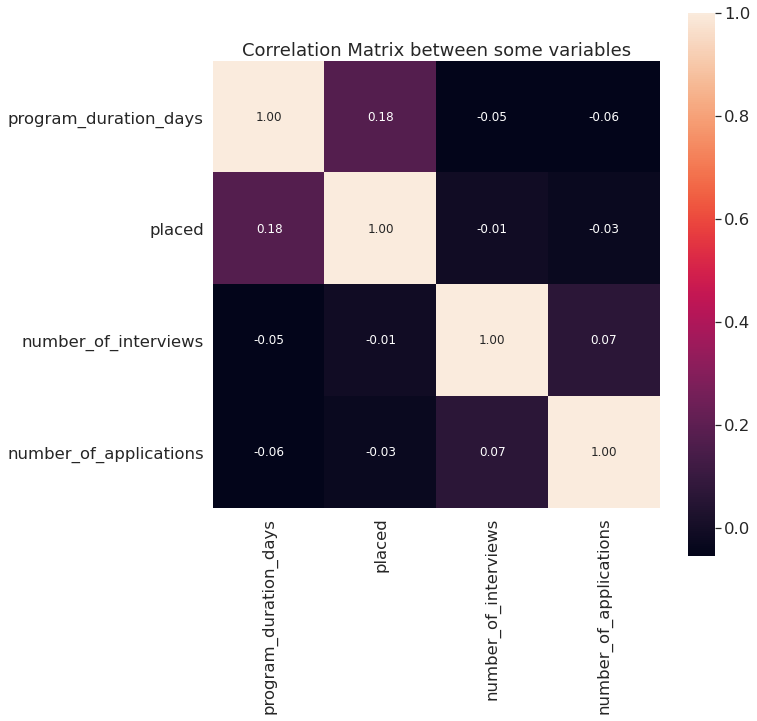

In [248]:
corrmat = df[['program_duration_days','number_of_interviews','placed','number_of_applications']].corr()

f, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Correlation Matrix between some variables')
k = 10 
cols = corrmat.nlargest(k, 'program_duration_days')['program_duration_days'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, 
                 square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There is a chance to improve the selection of features to improve the model, but it already hints the correlation between the program duration and the chance of being placed. However, being in the program doesn't automatically increase the chance for candidats to get interviews, as per the above matrix.
The matrix also signales the obvious when it comes to the number of applications: candidates can increase their of interviews by increasing their number of applications.

## Forecasting problem - Length to get a job

The second part of the analysis involves finding out how long until a candidate is placed based on the characteristics that are in the data. From exploration analysis, it appears that candidates spent around 4 months to get a job. 

In [91]:
durfeat_df = df_unknown_imputed.drop(columns=["id", "cohort_tag"])
durfeat_df.head(5)

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,136.098548,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,136.098548,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,0.000000,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,0.000000,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,89.000000,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [93]:
# Encoding

durfeatdf_encoded = durfeat_df.apply(lambda x: labenco[x.name].fit_transform(x))
durfeatdf_encoded

,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,0,4,136,0,4,0,1,5,1,0,2,39,2,6
1,0,3,136,0,4,5,1,2,0,1,7,0,2,6
2,2,1,0,0,2,4,3,1,3,1,0,0,2,2
3,2,3,0,0,0,0,3,2,3,1,6,13,2,1
4,5,4,89,1,4,0,0,5,0,3,11,23,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7,1,374,0,0,4,2,8,2,1,5,11,2,6
2540,7,0,389,0,5,4,1,5,0,3,1,7,2,6
2541,0,4,136,0,0,0,3,8,0,1,1,14,1,6
2542,0,4,136,0,5,4,3,8,0,1,2,10,2,1


In [137]:
X = durfeatdf_encoded[['pathrise_status', 'primary_track', 'placed', 'employment_status ', 'highest_level_of_education',
                       'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status',
                       'number_of_interviews', 'number_of_applications', 'gender', 'race']]
y = durfeatdf_encoded['program_duration_days']

In [98]:
# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [139]:
y_train.head(5)

1636    20.0
529      0.0
431      0.0
891      0.0
1690     0.0
Name: placed, dtype: float64

In [142]:
#X_train = sm.add_constant(X_train)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5863874345549738


With Logistic Regression, not only the model is slow in performance, the low accuracy score is showing that the model itself has not fitted very well with the data. I will try another model: Random Forest Regressor (below)

In [143]:
random_model = RandomForestRegressor(random_state = 12, n_estimators = 50,
                                   max_features= "sqrt", max_depth= 25, min_samples_split=2)
random_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=50,
                      random_state=12)

In [144]:
# Here is the score on the training data
random_model.score(X_train, y_train)

0.9958407776517293

However, how is the model going to perform on the test data?

In [145]:
random_model.score(X_test, y_test)

0.9738173323263927

The Random Forest model is performing well with both our training and test data. 

# Observation 

 - A large number of candidates are SWE students or unemployed who are looking to find work.
 - The majority of candidates have at least a Bachelor degree and Citizen of the USA
 - It appears that Pathrise is not well known in Canada, as per the low number of candidates.
 - The majority of candidates are White or Asian American, which could mean other racial groups are not aware of  the program, even though they could benefit greatly from it.
 - Most candidates get a placement after four months in the program, however the longer candidates stay in the program, the better their chance of being placed.
 - However, being in the program alone doesn't increase candidates chance of getting interviews.